# 6강. 회귀 문제를 이해하고 k-최근접 이웃 알고리즘으로 풀어 보기
- 길이로 무게 예측하기
    - 회귀 타겟 임의의 숫자 (무게)
    - 이진분류 타겟 코드값 0, 1

## 회귀
- 지도학습 중 임의의 숫자를 예측하는 것
- knn 분류
    - 가장 가까운 데이터 중 다수를 타겟으로 도출
- knn 회귀
    - 가장 가까운 데이터를 평균내서 예측값 도출

# 사전준비

In [1]:
# 기본적인 패키지부터 추가
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from importlib import reload

In [2]:
# 한글 설정/차트 마이너스 깨짐현상 없애기 / seaborn 화면설정
from matplotlib import rc

plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='darkgrid')


## 전체 데이터 로드
농어 길이, 무게 56개 샘플

In [3]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
                     21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
                     23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
                     27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
                     39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
                     44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
                     115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
                     150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
                     218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
                     556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
                     850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
                     1000.0])

### 농어 길이와 무게간 상관관계 확인
- 길이로 무게 예측
- 타겟: perch_weight

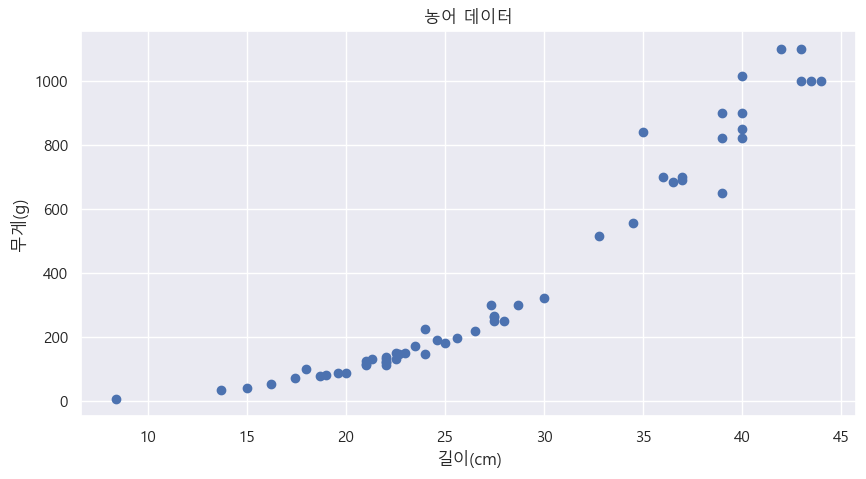

In [35]:
plt.figure(figsize=(10, 5))
plt.scatter(perch_length, perch_weight)

plt.title('농어 데이터')
plt.xlabel('길이(cm)')
plt.ylabel('무게(g)')
plt.show()

# 모델 학습

## KNN 회귀

### 데이터 분리
- 회귀에서는 임의의 숫자가 타겟이기 때문에 stratify를 넣지 않는다.

In [5]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

### 차원 변경
- 1차원 배열 -> 2차원 배열
    - 훈련세트는 특성이 열방향이기 때문에 2차원 배열이어야 한다.
    - 타겟은 1차원 배열이어도 된다.

In [6]:
train_input

array([19.6, 22. , 18.7, 17.4, 36. , 25. , 40. , 39. , 43. , 22. , 20. ,
       22. , 24. , 27.5, 43. , 40. , 24. , 21. , 27.5, 40. , 32.8, 26.5,
       36.5, 13.7, 22.7, 15. , 37. , 35. , 28.7, 23.5, 39. , 21. , 23. ,
       22. , 44. , 22.5, 19. , 37. , 22. , 25.6, 42. , 34.5])

In [7]:
train_input.shape

(42,)

#### reshape
- [차원 변경](https://supermemi.tistory.com/12)
- x = np.arrange(20)
    - x.reshape(-1, 5) = 열을 5개로 두고 행은 나머지를 계산한 값(20/5=4)으로 한다.
    - x.shape = (4, 5)

In [18]:
# 2차원으로 형태변환
# 열을 1로 두고 행은 나머지('-1')로 넣는다.
re_train_input = train_input.reshape(-1,1)
re_train_input

array([[19.6],
       [22. ],
       [18.7],
       [17.4],
       [36. ],
       [25. ],
       [40. ],
       [39. ],
       [43. ],
       [22. ],
       [20. ],
       [22. ],
       [24. ],
       [27.5],
       [43. ],
       [40. ],
       [24. ],
       [21. ],
       [27.5],
       [40. ],
       [32.8],
       [26.5],
       [36.5],
       [13.7],
       [22.7],
       [15. ],
       [37. ],
       [35. ],
       [28.7],
       [23.5],
       [39. ],
       [21. ],
       [23. ],
       [22. ],
       [44. ],
       [22.5],
       [19. ],
       [37. ],
       [22. ],
       [25.6],
       [42. ],
       [34.5]])

In [19]:
re_test_input = test_input.reshape(-1,1)
re_test_input

array([[ 8.4],
       [18. ],
       [27.5],
       [21.3],
       [22.5],
       [40. ],
       [30. ],
       [24.6],
       [39. ],
       [21. ],
       [43.5],
       [16.2],
       [28. ],
       [27.3]])

In [16]:
print(re_train_input.shape, re_test_input.shape)

(42, 1) (14, 1)


### 회귀 모델 훈련

#### 결정계수
- 분류에서는 정확도
- 회귀에서는 결정계수($R^2$)<br><br>
$R^2=1-{\sum\displaystyle{(타겟-예측)^2}\over \sum\displaystyle{(타겟-평균)^2}}$<br><br>
    - 예측이 평균정도만 예측하면 분모, 분자가 비슷해져 분모가 1에 가까워지기 때문에 결정계수가 0에 가까워지고
    - 예측이 타겟에 가까워지면 분자가 0에 가까워져서 결정계수가 1에 가까워진다.

In [20]:
from sklearn.neighbors import KNeighborsRegressor

In [21]:
knr = KNeighborsRegressor()
knr.fit(X=re_train_input, y=train_target)

KNeighborsRegressor()

In [22]:
knr.score(X=re_test_input, y=test_target)

0.992809406101064

#### 성능 판단 지표
- MAE; Mean Absolute Error 평균절댓값오차
    - 타겟(test_target)과 예측(test_pred)의 절댓값차이를 평균하여 반환한다.
- MSE; Mean Square Error 평균 제곱근 오차

In [23]:
from sklearn.metrics import mean_absolute_error

In [24]:
# 테스트 세트에 대한 예측 만듦
test_pred = knr.predict(X=re_test_input)

In [26]:
# 실제 측정된 농어의 무게 타겟 세트
test_target

array([   5.9,  100. ,  250. ,  130. ,  130. ,  820. ,  320. ,  188. ,
        900. ,  125. , 1000. ,   51.5,  250. ,  300. ])

In [27]:
# 예측된 무게 세트
test_pred # 8.4를 넣으면 60이 나온다. (5.9->60 차이가 많이 남)

array([  60. ,   79.6,  248. ,  122. ,  136. ,  847. ,  311.4,  183.4,
        847. ,  113. , 1010. ,   60. ,  248. ,  248. ])

In [28]:
# 테스트 타겟 세트에 대한 평균 절대값 오차(MAE) 계산()
mae = mean_absolute_error(y_true=test_target, y_pred=test_pred)
mae
# 19.15..: 결과에서 예측이 평균적으로 19.15g 정도 타겟값과 다르게 예측되었음

19.157142857142862

#### 과소 적합(underfitting)

- 훈련세트보다 테스트세트의 테스팅결과(결정계수값)가 더 좋을 경우<br>
    = 훈련세트 안좋음
- 훈련세트와 테스트세트의 결정계수값이 모두 낮은 경우
- 데이터 적을 때

#### 과대 적합(overfitting)

- 훈련세트보다 테스트세트의 테스팅결과(결정계수값)가 더 안 좋을 경우<br>
    = 너무 많이 훈련시켜서 훈련세트 매우 좋음

In [29]:
# 테스트시에도 X값은 2차원배열이 되어야 함
knr.score(X=re_test_input, y=test_target)
# 결정계수(정확도) = 0.9928

0.992809406101064

In [30]:
# 훈련한 테스트로 결정계수 구함
knr.score(X=re_train_input, y=train_target) # 0.9xx
# 훈련한 결정계수가 더 낮음 (or 둘다낮음): 과소 적합 = 데이터 적을 때

0.9698823289099254

### 모델 재훈련

#### 튜닝
모델을 조금 더 복잡하게 만든다. -> n_neighbors 기본 5 -> 조절<br>
과대적합 <-小- n_neighbors -大-> 과소적합

In [31]:
# 최근접 이웃의 개수를 줄임
knr.n_neighbors = 3 # 원래 5

# 재훈련
knr.fit(X=re_train_input, y=train_target)
knr.score(X=re_test_input, y=test_target)
# 0.9746

0.9746459963987609

In [32]:
knr.score(X=re_train_input, y=train_target)
# 과소적합 문제 해결 0.9746 -> 0.9884

0.9804899950518966

#### 산점도확인

In [ ]:
'''
plt.() -> 'str' object is not callable
str 안불러와지는 오류 
'''
# reload(plt)

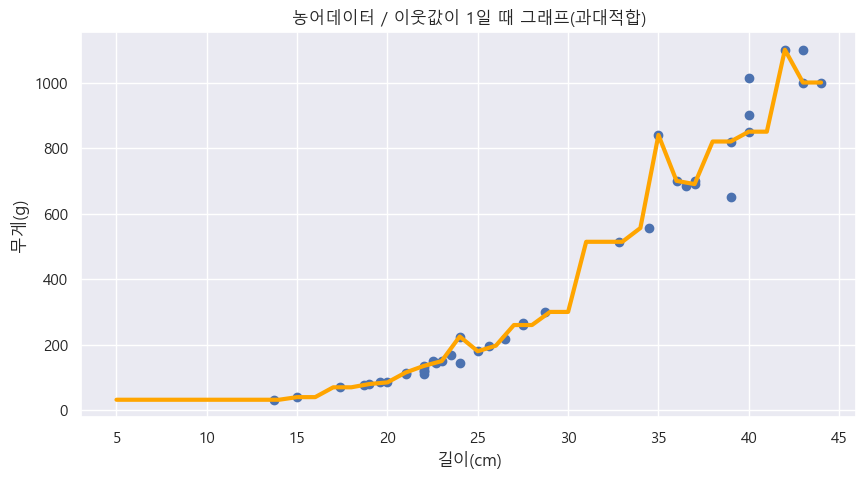

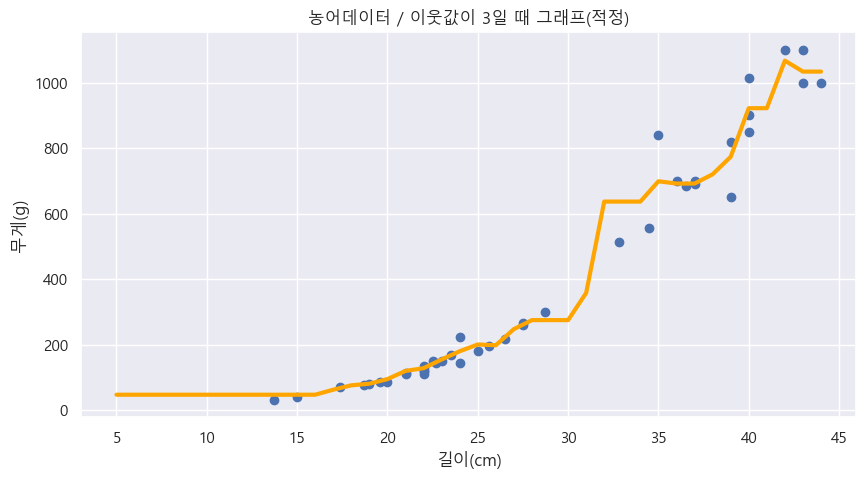

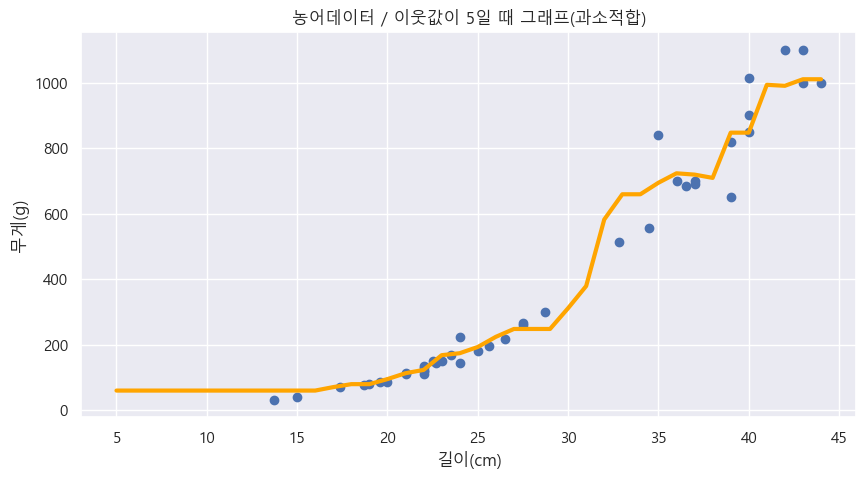

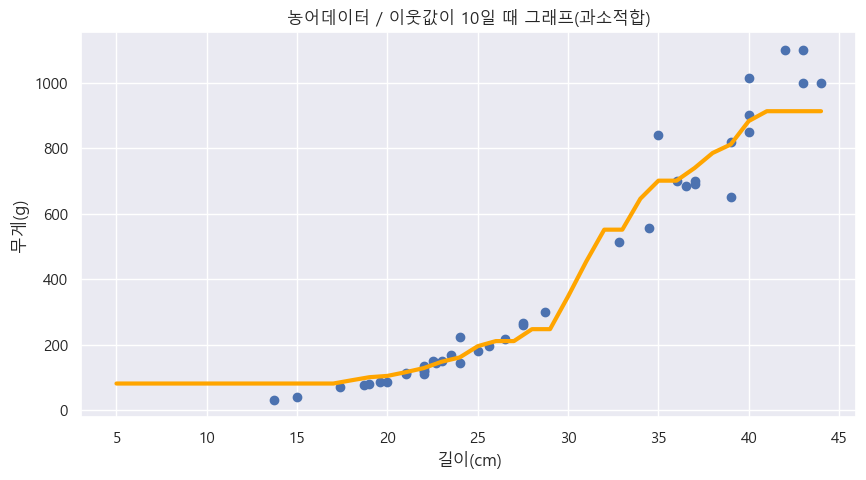

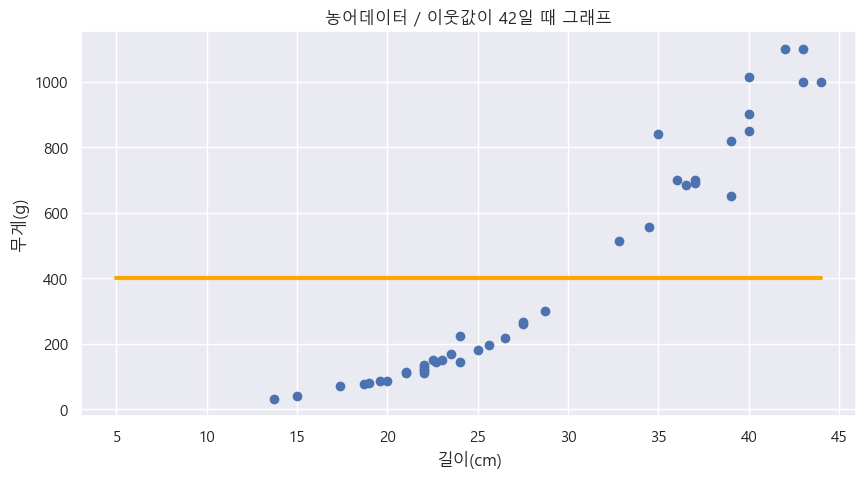

In [36]:
# KNN 회귀 객체를 만듦
knr = KNeighborsRegressor()
# 5~45까지 x좌표를 생성
x = np.arange(5,45).reshape(-1,1)

# k-이웃값을 1, 5, 10으로 변경하면서 예측을 하고 차트그리기
'''
1 : 과대적합
3 : 5보다 올라감 과소적합을 고칠수있
5 : ??????
10 : 과소적합
42 : 어떤 값을 넣든 평균값 : 랜덤값 randomstate 42 입력
'''
for n in [1, 3, 5, 10, 42]:
    knr.n_neighbors = n
    knr.fit(X=re_train_input, y=train_target)

    # x에 대한 예측 도출
    pred = knr.predict(X=x)
    # 훈련 세트와 예측 결과를 산점도에 표시
    plt.figure(figsize=(10,5))
    plt.scatter(x=re_train_input, y=train_target)
    plt.plot(x, pred, color='orange', linewidth='3.0') # 예측된 값 나타내줌
    title = f'농어데이터 / 이웃값이 {n}일 때 그래프'
    if n == 1:
        title += '(과대적합)'
    elif n == 3:
        title += '(적정)'
    elif n == 5:
        title += '(과소적합)'
    elif n == 10:
        title += '(과소적합)'
    plt.title(title)
    plt.xlabel('길이(cm)')
    plt.ylabel('무게(g)')
    plt.show()